# **Bootstrap Sampling from Two Gaussian Distributions**

### The Problem

Rafael Nadal and Novak Djokovic are playing each other in the next US Open final.  You have been asked to price up the Most Aces market (who will hit the most aces in the match).  You have access to historical data (both have played around 1200 career matches).

Matches on different court surfaces generally yield different numbers of aces, more aces on grass, fewer on hard court, fewer still on clay. Other factors may also impact, say indoor v outdoor.  Lets assume you can and have accurately rebased all your historical data points as if they were played in the revelvant conditions (outdoor hard court, 5 set match). 

From your modified dataset you have determined the underlying distribution of aces for each player are Gaussian (normal) distributions. Lets make the simplifying assumption that the distributions are independent of each other.  Lets say they have the following parameters:

Rafa Gaussian -  $\mu = 10, \sigma = 1.5$

Djokovic Gaussian -  $\mu = 12, \sigma = 2.5$

From this how would you estimate the pre match odds for the Most Aces market if:

    1). You have all 1200 data points and you use them once?
    
    2). You have all 1200 data points and you can sample from them more than once?
    
    3). The same players were rookies and you only had 20 available data points from the sample?



### Generate the Distributions

First lets generate the two distributions.

In [143]:
import pandas as pd
import numpy as np

# For repeatability
np.random.seed(seed=10)

# State the distribution parameters
rafa_mu = 10
rafa_sd = 1.5
djoko_mu = 12
djoko_sd = 2.5

# Generate the distributions
rafa_dist = np.random.normal(rafa_mu, rafa_sd, 1200)
djoko_dist = np.random.normal(djoko_mu, djoko_sd, 1200)

# Save distributions in a df (easier for visualisations later)
dist_df = pd.DataFrame(list(zip(rafa_dist, djoko_dist)),
                      columns = ['Rafa Aces', 'Djoko Aces'])

### View the Distributions

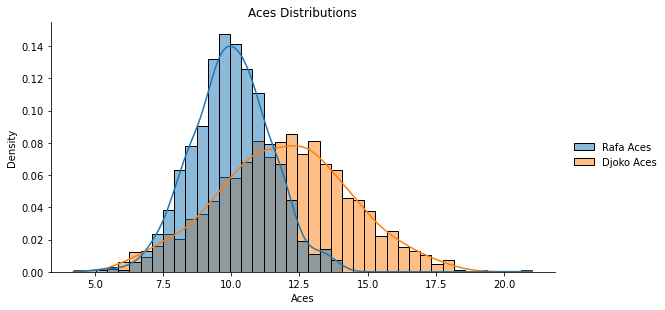

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn distribution plot
sns.displot(dist_df, kind='hist', stat = 'density', kde=True, height=4, aspect=2)
plt.title("Aces Distributions")
plt.xlabel("Aces")
plt.show()

This figure shows a histogram of the distribution of each players aces from their respective sample distributions, with a kernel density estimate (KDE) plot overlayed.  The KDE plots are not the exact normal distribution curves but in this case are acting as an approximation of one given we know the underlying samples came from a normal distribution.

Given our distribution parameters, as expected we can see that Rafas Aces samples cluster tighter around his mean of 10, while Djokovic has a wider variation around his higher mean of 12.

## Calculate the Most Aces Probability 

### Attempt 1 - Use all data points once only

To begin lets use sampling without replacement.


In [145]:
# Set up and run trials
# For repeatability
np.random.seed(seed=10)

#Set up counts
rafa_win_1 = 0
djoko_win_1 = 0

# 1). Randomly sample from each list without replacement
rafa_list_1 = np.random.choice(rafa_dist, 1200, replace=False)
djoko_list_1 = np.random.choice(djoko_dist, 1200, replace=False)

length_1 = len(rafa_list_1)

for i in range(length_1):
    if rafa_list_1[i] > djoko_list_1[i]:
        rafa_win_1 = rafa_win_1 + 1
    else:
        djoko_win_1 = djoko_win_1 + 1
        
print("Nadal trial wins =",rafa_win_1)
print("Djokovic trial wins =",djoko_win_1)

Nadal trial wins = 309
Djokovic trial wins = 891


Now lets calculate the implied probability and convert to decimal odds.

In [146]:
# Calculate implied probability
rafa_prob_1 = rafa_win_1/length_1
djoko_prob_1 = djoko_win_1/length_1

print("Nadal implied probability =", rafa_prob_1)
print("Djokovic implied probability =", djoko_prob_1)

Nadal implied probability = 0.2575
Djokovic implied probability = 0.7425


For a 100% book the conversion to decimal odds is as follows:

In [147]:
# Calculate decimal odds
rafa_odds_1 = (1/rafa_prob_1)
djoko_odds_1 = (1/djoko_prob_1)
print("Nadal Odds = {:.2f}".format(rafa_odds_1))
print("Djokovic Odds = {:.2f}".format(djoko_odds_1))

Nadal Odds = 3.88
Djokovic Odds = 1.35


We have caclulated that Djokovic should be the favourite with a price of 1.35 in decimal odds.

### Attempt 2 - Bootstrap sampling from all the data points

Sampling with replacement.  A data point used for sampling stays in the dataset and could be selected again.

In [148]:
# Set up and run trials
# For repeatability
np.random.seed(seed=10)

#Set up counts
rafa_win_2 = 0
djoko_win_2 = 0

# 2). Randomly sample from each list with replacement. 'replace=True' is the default but I've stated just to highlight.
rafa_list_2 = np.random.choice(rafa_dist, 10000, replace=True)
djoko_list_2 = np.random.choice(djoko_dist, 10000, replace=True)
  
length_2 = len(rafa_list_2)

for i in range(length_2):
    if rafa_list_2[i] > djoko_list_2[i]:
        rafa_win_2 = rafa_win_2 + 1
    else:
        djoko_win_2 = djoko_win_2 + 1
        
print("Nadal trial wins =",rafa_win_2)
print("Djokovic trial wins =",djoko_win_2)

Nadal trial wins = 2547
Djokovic trial wins = 7453


Calculate implied probability and convert to decimal odds.

In [149]:
# Calculate implied probability
rafa_prob_2 = rafa_win_2/length_2
djoko_prob_2 = djoko_win_2/length_2

print("Nadal implied probability =", rafa_prob_2)
print("Djokovic implied probability =", djoko_prob_2)

# Calculate decimal odds
rafa_odds_2 = (1/rafa_prob_2)
djoko_odds_2 = (1/djoko_prob_2)

print("Nadal Odds = {:.2f}".format(rafa_odds_2))
print("Djokovic Odds = {:.2f}".format(djoko_odds_2))

Nadal implied probability = 0.2547
Djokovic implied probability = 0.7453
Nadal Odds = 3.93
Djokovic Odds = 1.34


With over 8 times as much synthetic data now available the calculated odds are almost the same 1.34, to 1.35 for Djokovic's favourite price.  This suggests the initial sample size was large enough to be robust on its own.

### Attempt  3 - Bootstrap sampling from a smaller dataset

What if instead of two very experienced players with 1200 data points each you had to calculate the odds when they were both rookies?  Lets say they had only played 20 tour matches each.

In [150]:
# For repeatability
np.random.seed(seed=10)
data_points = 20

# Select 20 random data points for each rookie from the rafa/djoko distributions to act as their rookie career data
rookie1_data = np.random.choice(rafa_dist, data_points, replace=False)
rookie2_data = np.random.choice(djoko_dist, data_points, replace=False)

# Set up empty lists
rookie1_wins_bs = 0
rookie2_wins_bs = 0

# State number of samples to use
num_samples = 20
# State number of times to bootstrap
num_rounds = 1000

# Randomly sample from each list with replacement. This is the default but I've stated 'replace=True' just to highlight.
for i in range(num_rounds):
    rookie1_bs = np.random.choice(rookie1_data, num_samples, replace=True)
    rookie2_bs = np.random.choice(rookie2_data, num_samples, replace=True)
    
    for j in range(num_samples):
        if rookie1_bs[j] > rookie2_bs[j]:
            rookie1_wins_bs = rookie1_wins_bs + 1
        else:
            rookie2_wins_bs = rookie2_wins_bs + 1

    
print("Rookie Nadal trial wins =",rookie1_wins_bs)
print("Rookie Djokovic trial wins =",rookie2_wins_bs)

# Calculate implied probability
rookie1_prob_bs = rookie1_wins_bs/(num_samples*num_rounds)
rookie2_prob_bs = rookie2_wins_bs/(num_samples*num_rounds)

print("Rookie Nadal implied probability with bootstrapping =", rookie1_prob_bs)
print("Rookie Djokovic implied probability with bootstrapping=", rookie2_prob_bs)

# Calculate decimal odds
rookie1_odds_bs = (1/rookie1_prob_bs)
rookie2_odds_bs = (1/rookie2_prob_bs)

print("Rookie Nadal Odds with bootstrapping = {:.2f}".format(rookie1_odds_bs))
print("Rookie Djokovic Odds with bootstrapping = {:.2f}".format(rookie2_odds_bs))

Rookie Nadal trial wins = 5217
Rookie Djokovic trial wins = 14783
Rookie Nadal implied probability with bootstrapping = 0.26085
Rookie Djokovic implied probability with bootstrapping= 0.73915
Rookie Nadal Odds with bootstrapping = 3.83
Rookie Djokovic Odds with bootstrapping = 1.35


Well this is encouraging. In this case just one set of 20 random samples from each of the underlying distributions was enough with bootstrapping to calculate virtually the same underlying probability and odds produced by the complete dataset.

### Conclusion

In this simplified case of two independent Gaussian distributions the use of bootstrapping generated an accurate estimate of probability/odds despite only having access to a relatively small dataset.

For players with even fewer matches bootstrapping will still help but will get progressively less robust.  In these cases it may be better if you have a suitable dataset of all players to try and benchmark your rookie against his peers, perhaps using a machine learning technique such as clustering.  You could then infer what a larger sample of the players results might look like to reach the threshold for effective bootstrapping.  Benchmarking by clustering is something I'll look to explore in a future post.